# Random Forest Regressor

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
# ?? RandomForestRegressor


Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

In [4]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))

# Zadanie
wykonaj regresję z różnymi parametrami

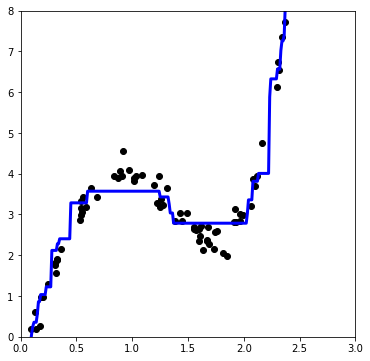

In [5]:
x=np.vstack(x)
x_plot = np.vstack(np.linspace(0, 10, 1000))
regr_rf = RandomForestRegressor(max_depth=5, n_estimators =5 ,random_state=2)
y_rbf = regr_rf.fit(x, y)
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, regr_rf.predict(x_plot), color='blue',linewidth=3)
plt.show()

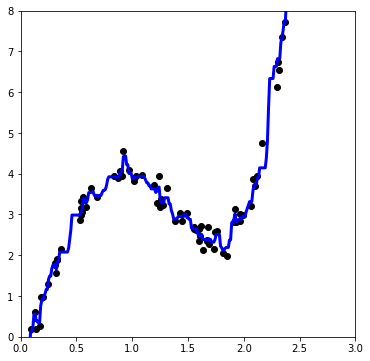

In [6]:
x=np.vstack(x)
x_plot = np.vstack(np.linspace(0, 10, 1000))
regr_rf = RandomForestRegressor(max_depth=10, max_features=1, n_estimators=10, random_state=3)
y_rbf = regr_rf.fit(x, y)
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, regr_rf.predict(x_plot), color='blue',linewidth=3)
plt.show()

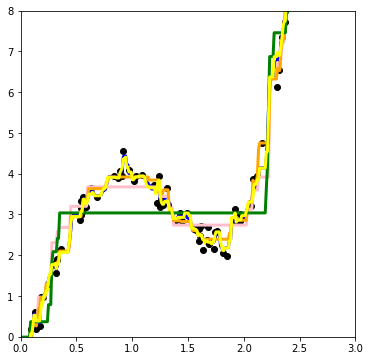

In [7]:
rfr1 = RandomForestRegressor(max_depth=10, max_features=1, n_estimators=10, random_state=3)
rfr1.fit(x,y)

rfr2 = RandomForestRegressor(max_depth=5, max_features=1, n_estimators=3, random_state=2)
rfr2.fit(x,y)

rfr3 = RandomForestRegressor(max_depth=7, max_features=1, n_estimators=5, random_state=2)
rfr3.fit(x,y)

rfr4 = RandomForestRegressor(max_depth=3, max_features=1, n_estimators=8, random_state=3)
rfr4.fit(x,y)

rfr5 = RandomForestRegressor(max_depth=11, max_features=1, n_estimators=6, random_state=3)
rfr5.fit(x,y)

x_plot = np.vstack(np.linspace(0, 10, 1000))
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, rfr1.predict(x_plot), color='blue',linewidth=3)
plt.plot(x_plot, rfr2.predict(x_plot), color='pink',linewidth=3)
plt.plot(x_plot, rfr3.predict(x_plot), color='orange',linewidth=3)
plt.plot(x_plot, rfr4.predict(x_plot), color='green',linewidth=3)
plt.plot(x_plot, rfr5.predict(x_plot), color='yellow',linewidth=3)
plt.show()

# Zad
Wyznacz optymalne parametry w modelu RandomForestRegressor za pomocą GridSearchCV

In [8]:
rfr = GridSearchCV(RandomForestRegressor(max_depth=10, max_features=1, n_estimators=10, random_state=3), cv=5,
                   param_grid={"max_depth": [5,10,15],
                               "max_features": [1,2,3,4,5],
                              "n_estimators": [10,20,30,50,100,500]})
rfr.fit(x, y)
rfr.best_params_

/Users/jakubstepien/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jakubstepien/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jakubstepien/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/jakubstepien/miniforge3/envs/env_tf/lib/python3.9/site-packages/joblib/parallel.py", lin

{'max_depth': 10, 'max_features': 1, 'n_estimators': 500}

# Zad

Wyznacz optymalne parametry dla modelu RandomForestRegressor.

In [9]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
rfr = GridSearchCV(RandomForestRegressor(max_depth=10, max_features=1, n_estimators=10, random_state=3), cv=5,
                   param_grid={"max_depth": [5,10,15],
                               "max_features": [1,2,3,4,5],
                              "n_estimators": [10,20,30,50,100,500]})
rfr.fit(X, y)
print(rfr.best_params_)

{'max_depth': 15, 'max_features': 3, 'n_estimators': 50}


/Users/jakubstepien/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jakubstepien/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jakubstepien/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/jakubstepien/miniforge3/envs/env_tf/lib/python3.9/site-packages/joblib/parallel.py", lin